# **Práctica 6: Datos Propios (EDA & PCA)**

Nombre: Angel Damian Monroy Mendoza

No. Cuenta: 316040707

Email: adamianmm@gmail.com

### **Contexto**

Existen dos conjuntos de datos están relacionados con variantes rojas y blancas del vino portugués "Vinho Verde".
Hoy en día, el vino es disfrutado cada vez más por una gama más amplia de consumidores. El "Vinho Verde" de Portugal ha tenido crecimiento en sus exportaciones, por lo que se vuelve de interés el garantizar la calidad el mismo.

**Objetivo:** Encontrar información de interés para clasificar la calidad de un vino tinto.


**Fuente de datos**
Variables de entrada (basadas en pruebas fisicoquímicas):

* 1 - fixed acidity (tartaric acid - g / dm^3)
* 2 - volatile acidity (acetic acid - g / dm^3)
* 3 - citric acid (g / dm^3)
* 4 - residual sugar (g / dm^3)
* 5 - chlorides (sodium chloride - g / dm^3
* 6 - free sulfur dioxide (mg / dm^3)
* 7 - total sulfur dioxide (mg / dm^3)
* 8 - density (g / cm^3)
* 9 - pH
* 10 - sulphates (potassium sulphate - g / dm3)
* 11 - alcohol (% by volume) 
* 12 - quality (score between 0 and 10)

### **Importar las bibliotecas y los datos**

In [1]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline                
# Para generar y almacenar los gráficos dentro del cuaderno

In [2]:
url='https://raw.githubusercontent.com/aDamianMonroym/Mineria-de-Datos/main/Datos/wineQualityReds.csv'
Vinos = pd.read_csv(url)
Vinos

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,2,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,3,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,4,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,5,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1595,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,1596,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,1597,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,1598,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Observamos que el conjunto de datos tiene una columna con los índices de las observaciones, por lo que tenemos que 
pasar el parámetro **index_col = 'Unnamed: 0'**, para que tome a esta columna como los índices y no tengamos un duplicado.

In [3]:
Vinos = pd.read_csv(url, index_col = 'Unnamed: 0')
Vinos

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
2,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
3,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1596,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1598,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### **Paso 1: Descripción de la estructura de los datos**

1) Forma (dimensiones) del DataFrame

El atributo .shape de Pandas proporciona una estructura general de los datos. Devuelve la cantidad de filas y columnas que tiene el conjunto de datos.

In [4]:
Vinos.shape

(1599, 12)

2) Tipos de datos (variables)

El atributo .dtypes muestra los tipos de datos de las columnas (variables y tipos).

In [5]:
Vinos.dtypes

fixed.acidity           float64
volatile.acidity        float64
citric.acid             float64
residual.sugar          float64
chlorides               float64
free.sulfur.dioxide     float64
total.sulfur.dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Aquí observamos que sólo la variable de 'quality' es de tipo entero. Las demás son de tipo flotante.

### **Paso 2: Identificación de datos faltantes**

Una función útil de pandas es **.isnull().sum()** que regresa la suma de todos los valores nulos en cada variable.

In [6]:
Vinos.isnull().sum()

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Otra forma de visualizarlo: **info()** para obtener el tipo de datos y la suma de valores nulos.

In [7]:
Vinos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 1 to 1599
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         1599 non-null   float64
 1   volatile.acidity      1599 non-null   float64
 2   citric.acid           1599 non-null   float64
 3   residual.sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free.sulfur.dioxide   1599 non-null   float64
 6   total.sulfur.dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


### **Paso 3: Detección de valores atípicos**

Se pueden utilizar gráficos para tener una idea general de las distribuciones de los datos, y se sacan estadísticas para resumir los datos. Estas dos estrategias son recomendables y se complementan.

La distribución se refiere a cómo se distribuyen los valores en una variable o con qué frecuencia ocurren.

Para las variables numéricas, se observa cuántas veces aparecen grupos de números en una columna. Mientras que para las variables categóricas, son las clases de cada columna y su frecuencia.

**1) Distribución de variables numéricas**

* Se utilizan histogramas que agrupan los números en rangos.
* La altura de una barra muestra cuántos números caen en ese rango. 
* Se emplea **hist()** para trazar el histograma de las variables numéricas. También se pueden usar los parámetros: **figsize** y **xrot** para aumentar el tamaño de la cuadrícula y rotar el eje x 45 grados.

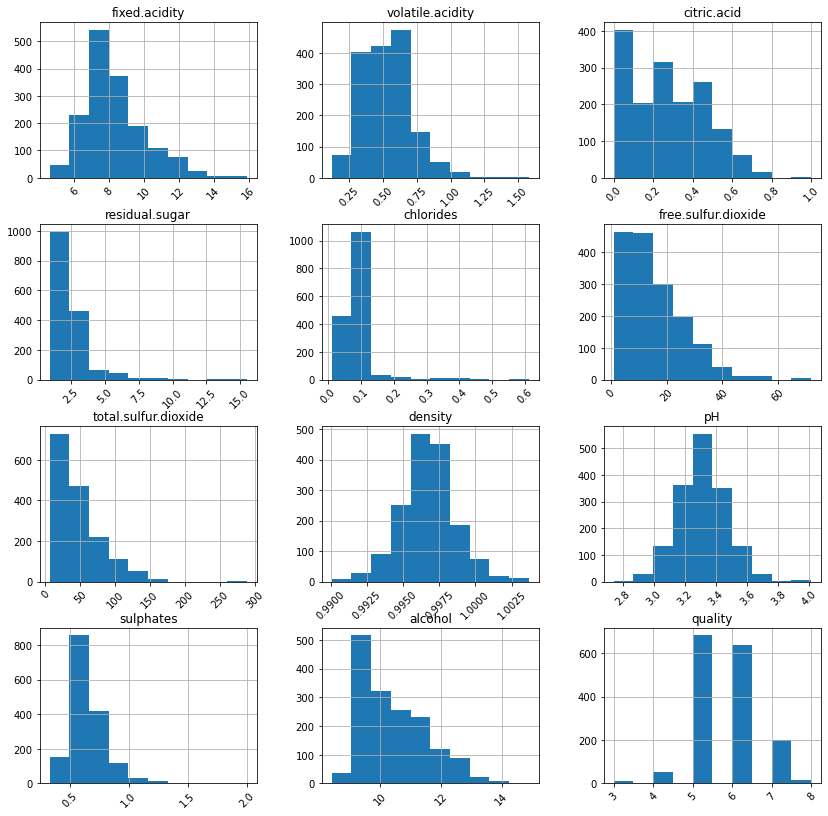

In [8]:
Vinos.hist(figsize=(14,14), xrot=45)
plt.show()

**Qué buscar:**

* Posibles valores atípicos, que pueden ser errores de medición.
* Límites que no tienen sentido, como valores porcentuales > 100.

En el histograma, se observa que **citric.acid** y **residual.sugar** tienen valores sesgados a la izquierda. La variable **chlorides** también está sesgada hacia la izquierda. **total.sulfur.dioxide** está sesgado hacia la izquierda y el límite está después de 250, cuando el extremo derecho de la distribución de los datos acaba entre 150 y 200, lo cual es extraño.

**2) Resumen estadístico de variables numéricas**

Se sacan estadísticas usando **describe()** que muestra un resumen estadístico de las variables numéricas.

In [9]:
Vinos.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


* Se incluye un recuento, media, desviación, valor mínimo, valor máximo, percentil inferior (25%), 50% y percentil superior (75%).
* Por defecto, el percentil 50 es lo mismo que la mediana.
* Se observa que para cada variable, el recuento también ayuda a identificar variables con valores perdidos. Sin embargo, ya habíamos notado que no existe ninguno.

**3) Diagramas para detectar posibles valores atípicos**

Para este tipo de gráficos se utiliza **Seaborn**, que permite generar diagramas de cajas para detectar valores atípicos.

C:\Users\Principal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


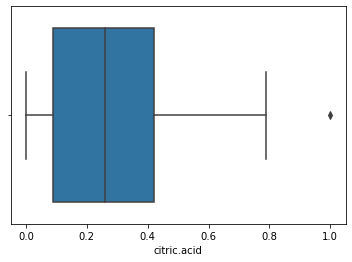

C:\Users\Principal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


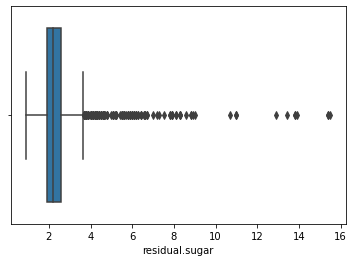

C:\Users\Principal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


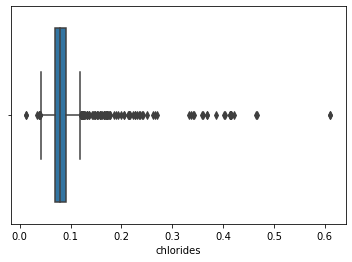

C:\Users\Principal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


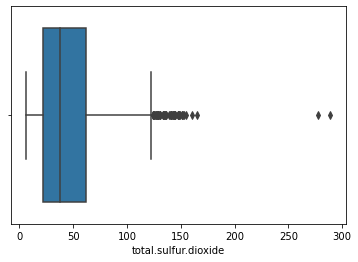

In [10]:
VariablesValoresAtipicos = ['citric.acid', 'residual.sugar', 'chlorides', 'total.sulfur.dioxide']
for col in VariablesValoresAtipicos:
  sns.boxplot(col, data=Vinos)
  plt.show()

Se observa que todas tienen valores atípicos que están lejos de los otros valores. Sin embargo, en las variables de **residual.sugar** y **chlorides**, los valores atípicos que se presentan no se ven tan extraños debido a que la diferencia entre ellos no es demasiado grande. No obstante, en estos casos se recomendaría hablar con el experto para obtener más información acerca de estas variables y, con base en ello, tomar una decisión.

## **Preparación de los datos**

Como no hay datos nulos, vamos a limpiar los valores atípicos.

C:\Users\Principal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


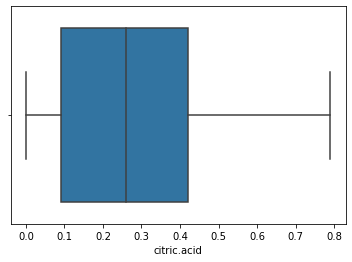

C:\Users\Principal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


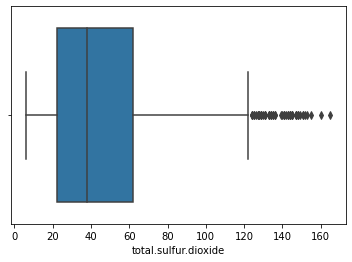

In [11]:
Vinos = Vinos[Vinos['citric.acid']<0.9]
Vinos = Vinos[Vinos['total.sulfur.dioxide']<200]
VariablesValoresAtipicos = ['citric.acid', 'total.sulfur.dioxide']
for col in VariablesValoresAtipicos:
  sns.boxplot(col, data=Vinos)
  plt.show()

Confirmamos la eliminación de los datos atípicos.

### **Paso 4: Identificación de relaciones entre pares variables**

Una matriz de correlaciones es útil para analizar la relación entre las variables numéricas.
Se emplea la función corr()

In [12]:
Vinos.corr()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
fixed.acidity,1.000000,-0.256791,0.676084,0.117075,0.093689,-0.154205,-0.115064,0.669068,-0.687076,0.183993,-0.060977,0.125603
volatile.acidity,-0.256791,1.000000,-0.553574,0.008550,0.062907,-0.007196,0.091097,0.019115,0.233522,-0.267860,-0.200157,-0.389514
citric.acid,0.676084,-0.553574,1.000000,0.133754,0.188690,-0.070788,0.015572,0.370161,-0.535496,0.304841,0.108535,0.229017
residual.sugar,0.117075,0.008550,0.133754,1.000000,0.058319,0.178370,0.173414,0.369452,-0.075542,0.007170,0.033861,0.005945
chlorides,0.093689,0.062907,0.188690,0.058319,1.000000,-0.003249,0.053608,0.196627,-0.252926,0.335235,-0.222033,-0.118204
free.sulfur.dioxide,-0.154205,-0.007196,-0.070788,0.178370,-0.003249,1.000000,0.672937,-0.018601,0.079816,0.047390,-0.073461,-0.053422
total.sulfur.dioxide,-0.115064,0.091097,0.015572,0.173414,0.053608,0.672937,1.000000,0.091064,-0.049230,0.050045,-0.229261,-0.206969
density,0.669068,0.019115,0.370161,0.369452,0.196627,-0.018601,0.091064,1.000000,-0.346188,0.142247,-0.493651,-0.170012
pH,-0.687076,0.233522,-0.535496,-0.075542,-0.252926,0.079816,-0.049230,-0.346188,1.000000,-0.185417,0.209586,-0.058868
sulphates,0.183993,-0.267860,0.304841,0.007170,0.335235,0.047390,0.050045,0.142247,-0.185417,1.000000,0.102577,0.269561


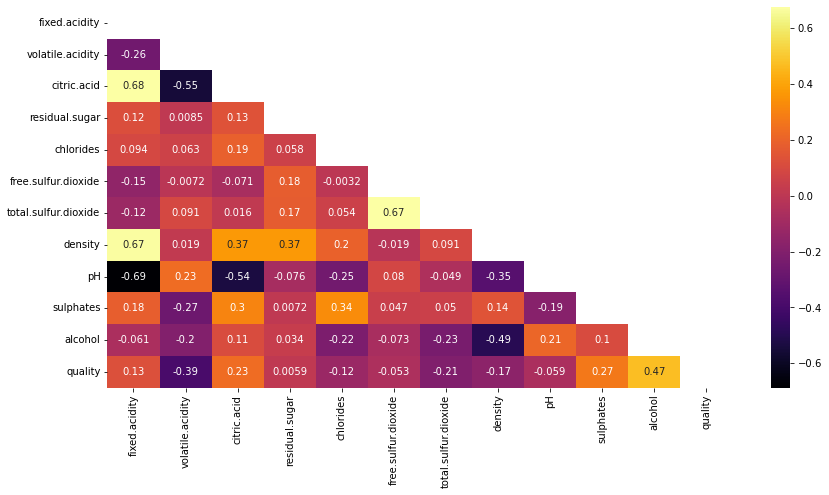

In [13]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(Vinos.corr())
sns.heatmap(Vinos.corr(), cmap='inferno', annot=True, mask = MatrizInf)
plt.show()

### Paso 2: Estandarización
Se hace una estandarización de los datos.

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler  
Estandarizar = StandardScaler()                          # Se instancia el objeto StandardScaler o MinMaxScaler 
MEstandarizada = Estandarizar.fit_transform(Vinos)  

In [5]:
pd.DataFrame(MEstandarizada, columns=Vinos.columns)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,-0.787823
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,0.450848
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,0.450848
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,-0.787823


#### Paso 3 y 4: Se calcula la matriz de covarianzas o correlaciones, y se calculan los componentes (eigen-vectores) y la varianza (eigen-valores).

In [29]:
pca = PCA(n_components=12)     #Se instancia el objeto PCA    #pca=PCA(n_components=None), pca=PCA(.85)
pca.fit(MEstandarizada)        #Se obtiene los componentes
print(pca.components_)

[[ 0.48788336 -0.26512898  0.47333547  0.13915442  0.19742679 -0.04588071
   0.00406675  0.37030119 -0.43272085  0.25453535 -0.07317678  0.11248878]
 [-0.00417321  0.33896786 -0.1373581   0.16773634  0.18978819  0.25948314
   0.36397137  0.33078079 -0.06544015 -0.10933362 -0.50270865 -0.47316621]
 [-0.16482854 -0.22708884  0.10022856  0.24362014 -0.02660785  0.61611132
   0.54073214 -0.16872267  0.06977056  0.21291324  0.22497138  0.22336929]
 [-0.23109808  0.04185824 -0.0567358  -0.38303758  0.65477782 -0.03371148
  -0.02845973 -0.20069341 -0.00546618  0.56050237 -0.09170143 -0.03666923]
 [-0.07877938  0.29937933 -0.12014871  0.70936319  0.26623723 -0.15941286
  -0.21845284  0.20879298  0.25764682  0.21483493  0.25972635  0.13758414]
 [ 0.0555313   0.297287    0.13663328  0.10931059  0.33733656 -0.04264807
   0.1159536  -0.42566742 -0.48035396 -0.40374303  0.39217625 -0.14183046]
 [-0.30721496 -0.62623369  0.24414858  0.28385429  0.23054697 -0.13826041
  -0.11020865 -0.12254646  0.185

In [30]:
pd.DataFrame(pca.components_)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.487883,-0.265129,0.473335,0.139154,0.197427,-0.045881,0.004067,0.370301,-0.432721,0.254535,-0.073177,0.112489
1,-0.004173,0.338968,-0.137358,0.167736,0.189788,0.259483,0.363971,0.330781,-0.065440,-0.109334,-0.502709,-0.473166
2,-0.164829,-0.227089,0.100229,0.243620,-0.026608,0.616111,0.540732,-0.168723,0.069771,0.212913,0.224971,0.223369
3,-0.231098,0.041858,-0.056736,-0.383038,0.654778,-0.033711,-0.028460,-0.200693,-0.005466,0.560502,-0.091701,-0.036669
4,-0.078779,0.299379,-0.120149,0.709363,0.266237,-0.159413,-0.218453,0.208793,0.257647,0.214835,0.259726,0.137584
5,0.055531,0.297287,0.136633,0.109311,0.337337,-0.042648,0.115954,-0.425667,-0.480354,-0.403743,0.392176,-0.141830
6,-0.307215,-0.626234,0.244149,0.283854,0.230547,-0.138260,-0.110209,-0.122546,0.185692,-0.233402,-0.121719,-0.412388
7,0.200529,0.146126,0.296333,-0.170626,-0.186923,-0.019356,0.089897,0.079500,0.314693,0.275492,0.471189,-0.612247
8,-0.174578,-0.060223,-0.220975,0.278187,-0.419936,-0.318000,0.121823,-0.249074,-0.461916,0.452689,-0.096528,-0.240243
9,-0.182956,0.155106,0.346086,-0.052237,-0.003863,-0.585389,0.589188,0.043538,0.207610,-0.071919,-0.110605,0.260240


#### **Paso 5:** Se decide el número de componentes principales

* Se calcula el porcentaje de relevancia, es decir, entre el 75 y 90% de varianza total.
* Se identifica mediante una gráfica el grupo de componentes con mayor varianza.

In [19]:
Varianza = pca.explained_variance_ratio_
print('Porporción de varianza:', Varianza)
print('Varianza acumulada:', sum(Varianza[0:7]))   
#Con 6 componentes se tiene el 87% de varianza acumulada y con 7 el 91%

Porporción de varianza: [0.2596822  0.18930143 0.13787736 0.09910259 0.0825205  0.05502166
 0.05204605 0.04260419 0.03493165 0.02677637 0.0152119  0.00492409]
Varianza acumulada: 0.8755518004230588


In [27]:
varianza = list(pca.explained_variance_ratio_)
sum = 0
i = 1
suma = []
for item in varianza:
    sum = sum + item
    if sum < 0.91:     
        suma.append(sum)
    else:
        break
df = pd.DataFrame(suma).reset_index()
df = df.rename(columns={'index': 'Componentes', 0:'Sum Var Acum'})
df

,Componentes,Sum Var Acum
0,0,0.260097
1,1,0.446921
2,2,0.587164
3,3,0.688416
4,4,0.769521
5,5,0.824737
6,6,0.876264


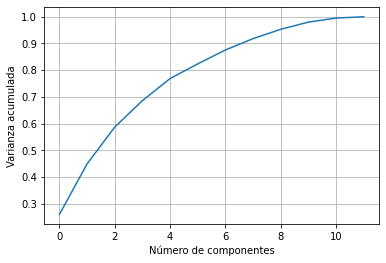

In [20]:
# Se grafica la varianza acumulada en los componentes
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.grid()
plt.show()

#### **Paso 6:** Se examina la proporción de relevancias –cargas–

La importancia de cada variable se refleja en la magnitud de los valores en los componentes (mayor magnitud es sinónimo de mayor importancia).

Se revisan los valores absolutos de los componentes principales seleccionados. Cuanto mayor sea el valor absoluto, más importante es esa variable en el componente principal.

In [21]:
print(pd.DataFrame(abs(pca.components_))) #Los componentes son las filas y las variables son las columnas.

          0         1         2         3         4         5         6   \
0   0.492423  0.269329  0.473970  0.135750  0.185362  0.057431  0.009873   
1   0.007078  0.327043  0.127735  0.173087  0.187847  0.264346  0.380687   
2   0.157693  0.239786  0.100900  0.214434  0.025069  0.620160  0.529271   
3   0.213225  0.040058  0.058307  0.413915  0.657214  0.055630  0.013149   
4   0.090355  0.289743  0.125567  0.700974  0.298273  0.152133  0.216773   
5   0.042680  0.238017  0.151473  0.129633  0.379728  0.008131  0.096914   
6   0.310157  0.653790  0.232346  0.263919  0.226445  0.115080  0.118891   
7   0.174994  0.141836  0.301729  0.141405  0.176290  0.067242  0.106322   
8   0.184142  0.078983  0.240680  0.308972  0.377432  0.264153  0.070032   
9   0.209177  0.148766  0.332639  0.007409  0.033316  0.602745  0.594918   
10  0.251937  0.380607  0.622992  0.082895  0.190750  0.248130  0.357329   
11  0.639685  0.003007  0.070883  0.184655  0.048267  0.059225  0.079627   

          7

In [22]:
CargasComponentes = pd.DataFrame(pca.components_, columns=Vinos.columns)
CargasComponentes

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,0.492423,-0.269329,0.473970,0.135750,0.185362,-0.057431,-0.009873,0.370655,-0.431025,0.248252,-0.068650,0.121004
1,0.007078,0.327043,-0.127735,0.173087,0.187847,0.264346,0.380687,0.337000,-0.071786,-0.113678,-0.499557,-0.464141
2,-0.157693,-0.239786,0.100900,0.214434,-0.025069,0.620160,0.529271,-0.157317,0.080759,0.248953,0.221070,0.232373
3,-0.213225,0.040058,-0.058307,-0.413915,0.657214,-0.055630,-0.013149,-0.199281,-0.026058,0.536082,-0.118604,-0.034123
4,-0.090355,0.289743,-0.125567,0.700974,0.298273,-0.152133,-0.216773,0.200755,0.259240,0.233563,0.245142,0.139636
5,0.042680,0.238017,0.151473,0.129633,0.379728,0.008131,0.096914,-0.419451,-0.450026,-0.446403,0.390673,-0.133277
6,-0.310157,-0.653790,0.232346,0.263919,0.226445,-0.115080,-0.118891,-0.093073,0.220601,-0.221387,-0.160926,-0.376604
7,0.174994,0.141836,0.301729,-0.141405,-0.176290,-0.067242,0.106322,0.049739,0.285634,0.289487,0.466716,-0.636893
8,-0.184142,-0.078983,-0.240680,0.308972,-0.377432,-0.264153,0.070032,-0.284959,-0.517016,0.413624,-0.098463,-0.245030
9,-0.209177,0.148766,0.332639,-0.007409,-0.033316,-0.602745,0.594918,0.009686,0.143361,-0.068439,-0.111037,0.259639


In [23]:
CargasComponentes = pd.DataFrame(abs(pca.components_), columns=Vinos.columns) #Empezamos la poda con 50% y máximo hasta 35%. 
CargasComponentes #al menos 2 variables debes discriminar en tu análisis, si no se obtiene esto y tienes muy pocas variables, 
#sube/baja tu trheshold

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,0.492423,0.269329,0.473970,0.135750,0.185362,0.057431,0.009873,0.370655,0.431025,0.248252,0.068650,0.121004
1,0.007078,0.327043,0.127735,0.173087,0.187847,0.264346,0.380687,0.337000,0.071786,0.113678,0.499557,0.464141
2,0.157693,0.239786,0.100900,0.214434,0.025069,0.620160,0.529271,0.157317,0.080759,0.248953,0.221070,0.232373
3,0.213225,0.040058,0.058307,0.413915,0.657214,0.055630,0.013149,0.199281,0.026058,0.536082,0.118604,0.034123
4,0.090355,0.289743,0.125567,0.700974,0.298273,0.152133,0.216773,0.200755,0.259240,0.233563,0.245142,0.139636
5,0.042680,0.238017,0.151473,0.129633,0.379728,0.008131,0.096914,0.419451,0.450026,0.446403,0.390673,0.133277
6,0.310157,0.653790,0.232346,0.263919,0.226445,0.115080,0.118891,0.093073,0.220601,0.221387,0.160926,0.376604
7,0.174994,0.141836,0.301729,0.141405,0.176290,0.067242,0.106322,0.049739,0.285634,0.289487,0.466716,0.636893
8,0.184142,0.078983,0.240680,0.308972,0.377432,0.264153,0.070032,0.284959,0.517016,0.413624,0.098463,0.245030
9,0.209177,0.148766,0.332639,0.007409,0.033316,0.602745,0.594918,0.009686,0.143361,0.068439,0.111037,0.259639


In [25]:
VinosPCA = Vinos.drop(columns = ['volatile.acidity','citric.acid','total.sulfur.dioxide','density','pH','quality'])
VinosPCA

,fixed.acidity,residual.sugar,chlorides,free.sulfur.dioxide,sulphates,alcohol
1,7.4,1.9,0.076,11.0,0.56,9.4
2,7.8,2.6,0.098,25.0,0.68,9.8
3,7.8,2.3,0.092,15.0,0.65,9.8
4,11.2,1.9,0.075,17.0,0.58,9.8
5,7.4,1.9,0.076,11.0,0.56,9.4
...,...,...,...,...,...,...
1595,6.2,2.0,0.090,32.0,0.58,10.5
1596,5.9,2.2,0.062,39.0,0.76,11.2
1597,6.3,2.3,0.076,29.0,0.75,11.0
1598,5.9,2.0,0.075,32.0,0.71,10.2
